<a href="https://colab.research.google.com/github/kaizen-abhinav/PDECODE-APPLICATIONCHALLENGES/blob/main/Experiment8_AP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application Challenge: RL Circuit Response to a Voltage Pulse
Instead of an instantaneous impulse, let’s consider a more realistic scenario where a voltage is applied for a fixed duration. This creates a rectangular voltage pulse.

**Your Task**

Model the same RL circuit ($R=10 \Omega$
, $L=1 H$
) but change the input voltage. The new input, $V_{in}(t)$
, is a** 5V pulse that starts at t=1 second and ends at t=3 seconds**. * Input Voltage:
$V_{in}(t) = \begin{cases} 0 & t < 1 \\ 5 & 1 \le t < 3 \\ 0 & t \ge 3 \end{cases}$

- Governing Equation: $L \frac{di(t)}{dt} + R i(t) = V_{in}(t)$


- Initial Condition: The circuit starts with zero current, $i(0)=0$
.

Find and visualize the current response $i(t)$
.

**The Challenge**
1. Represent the rectangular voltage pulse, $V_{in}(t)$
, using a combination of two Heaviside step functions.

2. Set up the differential equation in SymPy with this new input.

3. Use `dsolve` with the initial condition to find the symbolic solution for the current, $i(t)$
.

4. Plot both the input voltage pulse and the resulting current on the same graph to see the cause-and-effect relationship.

**Hint**

A pulse that turns on at $t=a$
 and off at $t=b$
 with height H can be constructed as: $f(t) = H \cdot [u(t-a) - u(t-b)]$
. In` SymPy`, this would be `H * (sp.Heaviside(t - a) - sp.Heaviside(t - b))`.



# Solution to the Application Challenge

Here is the complete Python implementation and analysis for the RL circuit’s response to the defined voltage pulse.

**Python Implementation**

The symbolic solution for the current i(t) is:


Eq(i(t), 0)

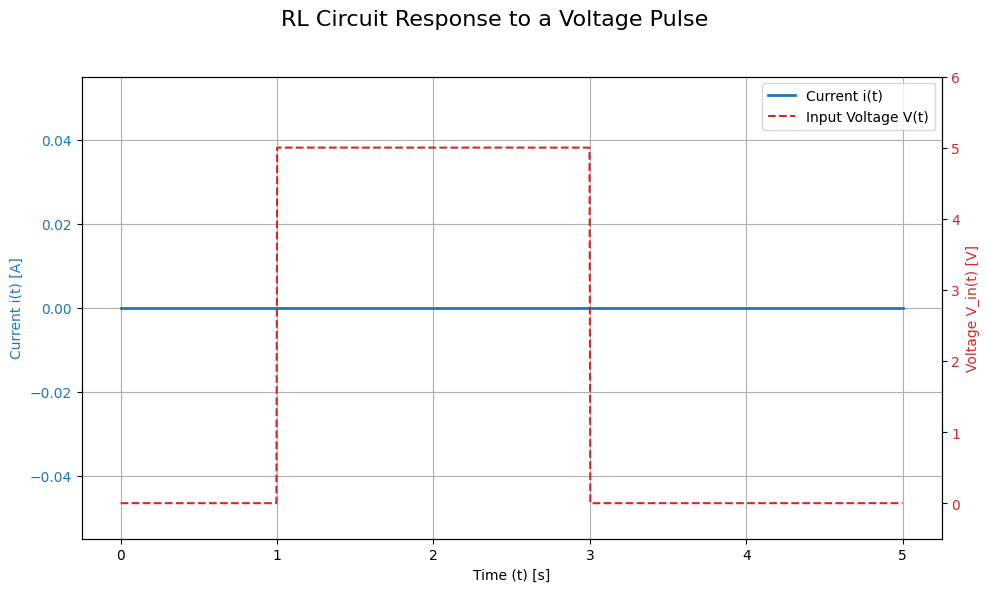

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Symbols, Function, and Parameters ---
t = sp.Symbol('t', positive=True)
i = sp.Function('i')

# System parameters
R = 10.0
L = 1.0
V_amp = 5.0 # Amplitude of the voltage pulse

# --- 2. Define the Pulse Input and the ODE ---
# Construct the rectangular pulse using two Heaviside functions
V_in = V_amp * (sp.Heaviside(t - 1) - sp.Heaviside(t - 3))

# Define the differential equation
ode = L * i(t).diff(t) + R * i(t) - V_in

# Solve using dsolve with the initial condition i(0)=0
solution = sp.dsolve(ode, ics={i(0): 0})

# Display the symbolic solution
print("The symbolic solution for the current i(t) is:")
display(solution)
i_t = solution.rhs

# --- 3. Visualize the Solution and the Input ---
# Create numerical functions for plotting
i_func = sp.lambdify(t, i_t, 'numpy')
V_func = sp.lambdify(t, V_in, 'numpy')

t_vals = np.linspace(0, 5, 1000) # Plot for 5 seconds to see the full decay

i_vals = [i_func(t_val) for t_val in t_vals]
V_vals = V_func(t_vals)


# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the current (left y-axis)
color = 'tab:blue'
ax1.set_xlabel('Time (t) [s]')
ax1.set_ylabel('Current i(t) [A]', color=color)
ax1.plot(t_vals, i_vals, color=color, linewidth=2, label='Current i(t)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

# Create a second y-axis for the voltage
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Voltage V_in(t) [V]', color=color)
ax2.plot(t_vals, V_vals, color=color, linestyle='--', label='Input Voltage V(t)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-0.5, 6) # Set voltage limits for clarity

fig.suptitle('RL Circuit Response to a Voltage Pulse', fontsize=16)
# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Results and Discussion

- Symbolic Solution: The solution provided by `SymPy` is a piecewise function. This is the correct mathematical representation, as the behavior of the current is described by different equations during different time intervals, corresponding to when the voltage is off, on, and off again.

- Visual Analysis & Physical Interpretation: The plot clearly shows three distinct phases of behavior: Phase 1 ($0 \leq t < 1$
): The input voltage is zero. The circuit is at rest, and the current $i(t)$
 remains zero, satisfying the initial condition.

- Phase 2 ( $1 \leq t < 3$
): The 5V pulse is applied. The current begins to rise exponentially, following the characteristic charging curve of an RL circuit. It aims for a steady-state value of $I
_{max} =\frac{V}{R}=5V/10\Omega =0.5A$

. However, the voltage is turned off before it can reach this steady state.

- Phase 3 ( $t \geq 3$
): The input voltage drops back to zero. The inductor, which had stored energy in its magnetic field, now acts as a temporary source. It forces the current to continue flowing, but with the circuit now closed and the external source gone, the current decays exponentially as the stored energy is dissipated by the resistor.

- Engineering Significance: This simulation is extremely practical. It models how a digital logic signal (a pulse) affects an inductive load like a relay or motor winding. The solution shows that the current doesn’t instantaneously follow the voltage; there is a lag due to the inductor’s opposition to a change in current. It also demonstrates that even after the input signal is removed, a current can persist for a short time, a crucial consideration for timing in high-speed circuits. The use of Heaviside functions provides a powerful and elegant way to model and analyze these common switching phenomena.